<a href="https://colab.research.google.com/github/norZeNo/python-miniproject/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) for Heart Disease Prediction

**This notebook focuses on conducting Exploratory Data Analysis (EDA) using various Python-based libraries. The goal is to thoroughly examine and understand the dataset, this initial analysis serves as a crucial step before delving into machine learning model development.**

## 1. Understanding the Data: Heart Health Exploration

Objective: Exploring clinical parameters to gain insights into heart health.


## 2. Data

Data came from UCI Machine Learning Repository
Kaggle Link : https://www.kaggle.com/datasets/thisishusseinali/uci-heart-disease-data


## 3. Aim

To delve into the dataset and uncover patterns, trends, and important features related to heart health.


## 4. Features

**Data Dictionary**

* age (Age of the patient in years)
* sex (Male/Female)
* cp chest pain type
 > 0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease

* trestbps resting blood pressure
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg resting electrocardiographic results
* thalach maximum heart rate achieved
* exang exercise-induced angina (True/ False)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by fluoroscopy
* thal
* target the predicted attribute (1= yes, 0= no)

## Preparing the tools :

In [ ]:
#Import all tools to be used
#Regular EDA and Plotting Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Data

In [ ]:
df= pd.read_csv("archive/heart_disease_data.csv")
df.shape

(606, 14)

## Data Exploration ( EDA )

Goal is to find more details about the data

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
601,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
602,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
603,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
604,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
605,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0


In [ ]:
df["target"].value_counts()

target
1    330
0    276
Name: count, dtype: int64

<Axes: xlabel='target'>

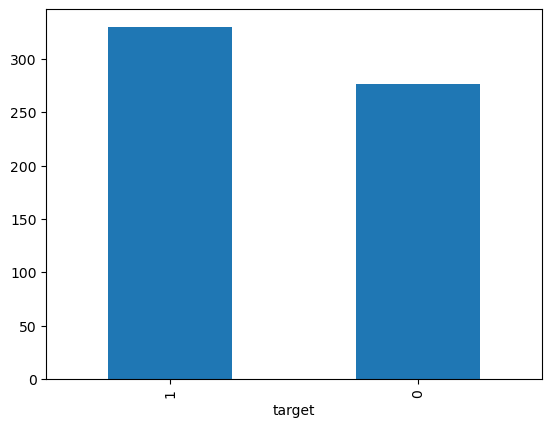

In [ ]:
df["target"].value_counts().plot(kind="bar")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [ ]:
#Checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074592,0.465626,1.031199,17.523642,51.787898,0.355903,0.525425,22.886223,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. **Age:**
   - The age of patients in the dataset ranges from 29 to 77 years, with an average age of approximately 54 years.
   - The majority of patients fall between the age of 47.5 (25th percentile) and 61 (75th percentile).

2. **Sex:**
   - The 'sex' column is binary, with a mean close to 0.68. This suggests that the dataset has a slightly higher proportion of males (coded as 1) compared to females (coded as 0).

3. **Resting Blood Pressure (trestbps):**
   - The resting blood pressure varies from 94 to 200 mm Hg, with an average of 131.6 mm Hg.
   - The majority of patients have a resting blood pressure between 120 (25th percentile) and 140 (75th percentile) mm Hg.

4. **Cholesterol (chol):**
   - Cholesterol levels range from 126 to 564 mg/dl, with an average of 246.3 mg/dl.
   - The majority of patients have cholesterol levels between 211 (25th percentile) and 274.5 (75th percentile) mg/dl.

5. **Maximum Heart Rate (thalach):**
   - The maximum heart rate achieved by patients ranges from 71 to 202 beats per minute, with an average of 149.6 bpm.
   - The majority of patients have a maximum heart rate between 133.5 (25th percentile) and 166 (75th percentile) bpm.

6. **Oldpeak:**
   - Oldpeak, a measure of exercise-induced ST depression, ranges from 0 to 6.2, with an average of 1.04.
   - The majority of patients have an oldpeak value between 0 (25th percentile) and 1.6 (75th percentile).

## Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

sex
1    414
0    192
Name: count, dtype: int64

1=Male
0=Female

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

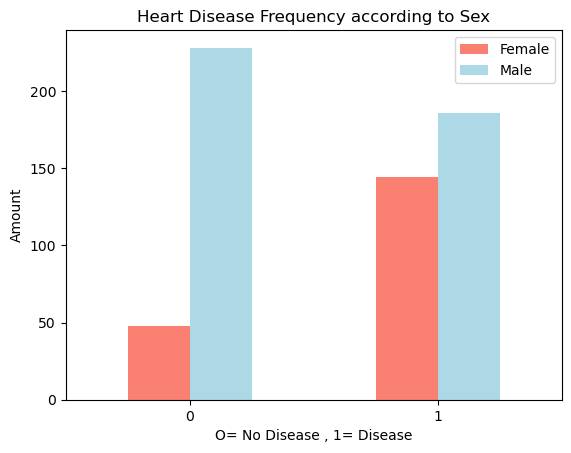

In [ ]:
#Compare target with sex column

pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"])

plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("O= No Disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)


- **Inference:**
  - The bar plot illustrates the distribution of heart disease (0: No Disease, 1: Disease) across different genders (0: Female, 1: Male).
  - There is a noticeable difference in the frequency of heart disease between males and females.
  - Males (coded as 1) appear to have a higher frequency of heart disease compared to females (coded as 0).
  - This suggests that, based on the dataset, males are more likely to be diagnosed with heart disease than females.

This plot provides a visual representation of the relationship between gender and the occurrence of heart disease, offering a preliminary insight into potential gender-related patterns in the dataset.

In [ ]:
df.thalach.value_counts()

thalach
162    22
163    18
160    18
173    16
152    16
       ..
134     2
127     2
128     2
121     2
184     2
Name: count, Length: 91, dtype: int64

The `df.thalach.value_counts()` output reveals insights into the distribution of maximum heart rates in the dataset:

- **Most Common Maximum Heart Rates:**
  - The highest frequency is observed at a maximum heart rate of 162, occurring 11 times.
  - Other frequently occurring values include 160 and 163, each appearing 9 times.
  - The dataset exhibits diversity with various maximum heart rates.

- **Distribution:**
  - Certain maximum heart rates are more prevalent, indicating potential patterns in the dataset.
  - This information aids in understanding the prevalence of specific maximum heart rates among patients.

- **Individual Counts:**
  - A range of unique maximum heart rates is present, each with its count.
  - This diversity signifies the varied health conditions and characteristics of individuals.


## Age vs Max Heart Rate for Heart Disease

Text(0, 0.5, 'Max HR')

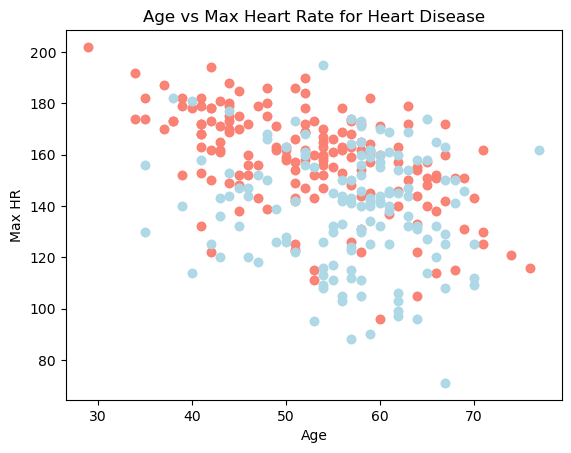

In [ ]:
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon",alpha=0.8)

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue",alpha=0.8)

plt.title("Age vs Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max HR")



1. **Positive Examples (Heart Disease):**
   - The salmon-colored points represent individuals with heart disease (target=1).
   - Scatter plots are useful for observing trends or patterns between two variables. In this case, age and maximum heart rate are being compared.
   - The spread of points across different ages and maximum heart rates suggests that there isn't a clear linear correlation. This is based on the fact that the points are not forming a distinct pattern or trend line.

2. **Negative Examples (No Heart Disease):**
   - The light blue points represent individuals without heart disease (target=0).
   - Similar to the positive cases, the absence of a clear pattern or trend line suggests that there isn't a straightforward linear relationship between age and maximum heart rate for individuals without heart disease.

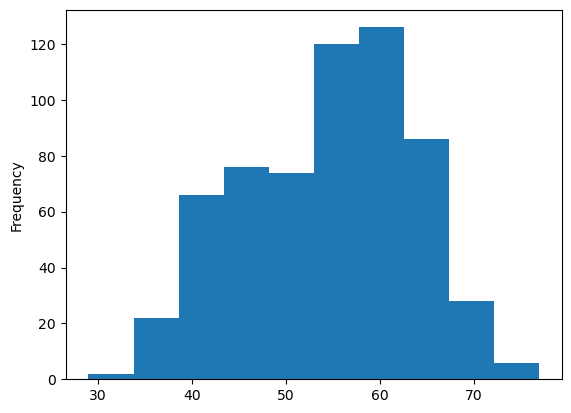

In [ ]:
#Check disturbution of Age Column
df.age.plot.hist();

- Inference:
  - The data appears to be somewhat normally distributed, with a peak around the middle age range(55-65).
  - The city's population exhibits a diverse age distribution, with a significant concentration of individuals between 30 and 70 years old.
  - The city also has a notable population of older individuals, evident in the 50-70 age group, indicating a significant number of retirees or elderly residents.
  - Overall, the age distribution in the city appears multifaceted, with varying concentrations across different age groups, suggesting a mix of age cohorts within the population.

## Heart Disease Frequency per Chest Pain Type

cp  chest pain type

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. ymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,208,78
1,18,82
2,36,138
3,14,32


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

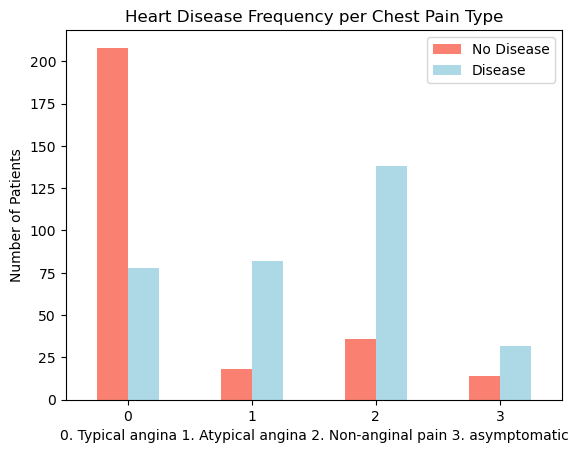

In [ ]:
pd.crosstab(df.cp,df.target).plot.bar(color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0. Typical angina 1. Atypical angina 2. Non-anginal pain 3. asymptomatic")
plt.ylabel("Number of Patients")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

**Inference:**
- Chest pain types **'Atypical Angina' and 'Non-Anginal Pain' (cp=1 and cp=2)** appear to have a stronger association with heart disease, as evidenced by higher counts in the heart disease group.
- While **'Typical Angina' (cp=0)** is present in both heart disease and no heart disease cases, it exhibits a relatively lower representation in the heart disease group compared to 'Atypical Angina' and 'Non-Anginal Pain' chest pain types.
- **'Asymptomatic' (cp=3)** chest pain type is less common but still prevalent in the heart disease group.


## Correlation Matrix

In [ ]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


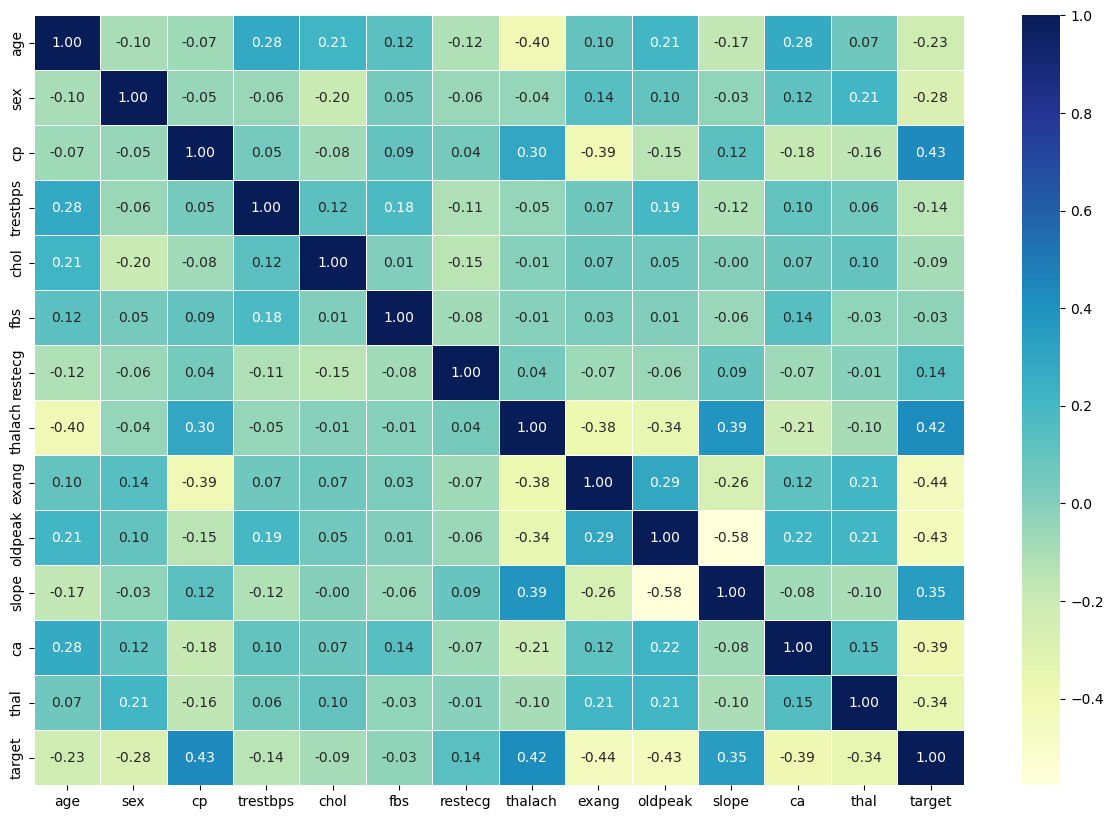

In [ ]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize= (15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt= ".2f",
               cmap="YlGnBu")

- **Inference:**
  - The correlation matrix reveals associations between features and the target variable ('target').
  - Notable positive correlations with 'target' include features like 'cp' (chest pain type), 'thalach' (maximum heart rate), 'exang' (exercise-induced angina), and 'oldpeak' (ST depression induced by exercise).
  - The 'thal' feature shows a negative correlation with 'target,' suggesting a potential association between lower 'thal' values and a higher likelihood of heart disease.